<a href="https://colab.research.google.com/github/sree244/-ReviseWithArsh/blob/main/DWDM_assignment_1(harshi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DWDM Assignment
## Sree Harshini.V
## 22BCE20284

### The Titanic dataset is a collection of real-world data from the passengers aboard the RMS Titanic, which sank after hitting an iceberg on its maiden voyage on April 15, 1912. The dataset is commonly used for machine learning classification tasks where the goal is to predict whether a passenger survived the disaster based on various attributes such as age, gender, class, and fare.

### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [ ]:
data=pd.read_csv('titanic.csv')

### Viewing data and different features

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Data Visualization

<Axes: xlabel='Sex'>

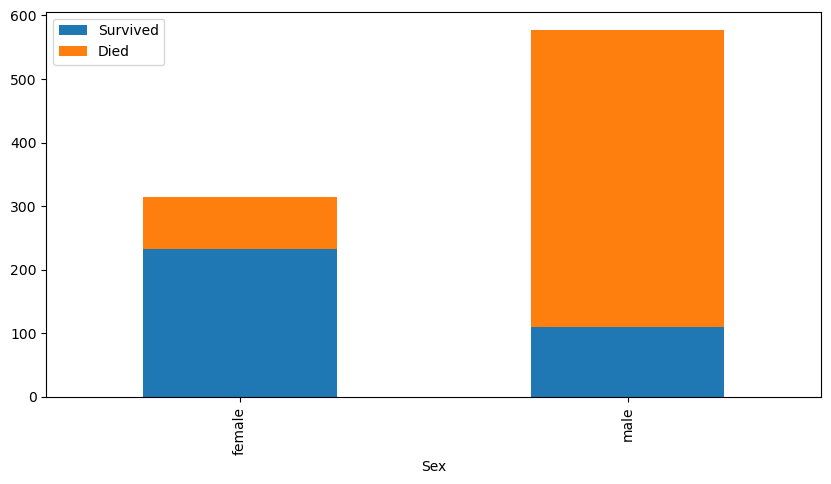

In [ ]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(10, 5),stacked=True)

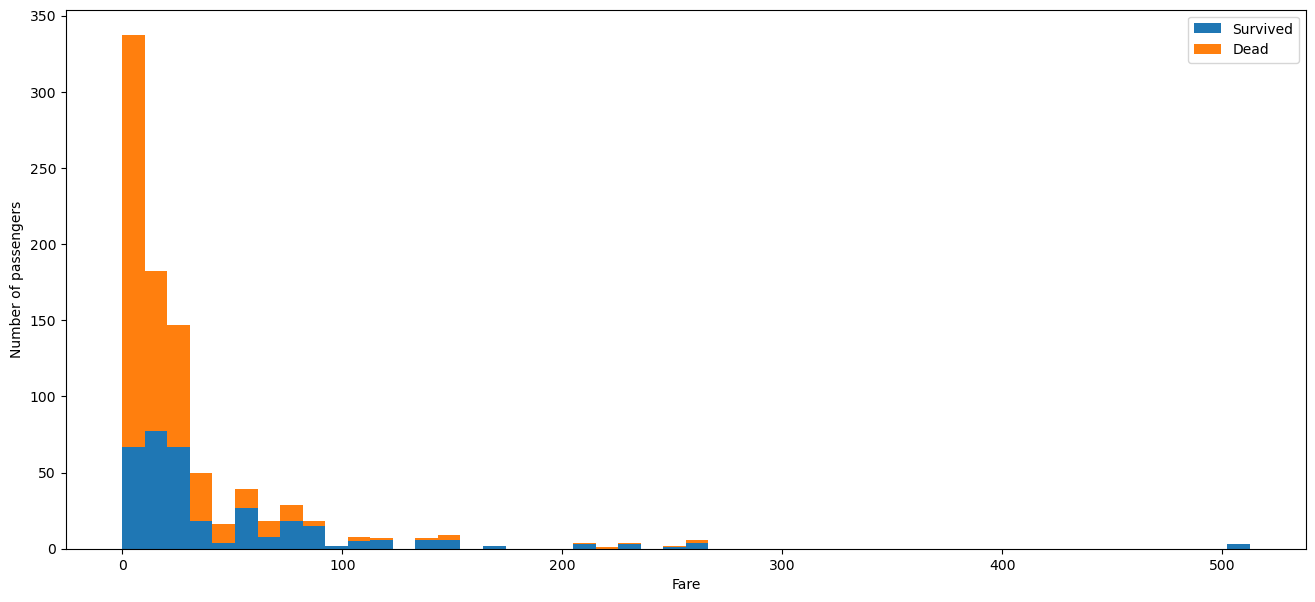

In [ ]:
figure = plt.figure(figsize=(16, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
         stacked=True, bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

### Removing irrelevant columns (removing these columns will not affect the output variable)

In [ ]:
df1=data.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


### Handling missing values - Filling missing attributes with the mean of those attributes

In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
mean_age_men=df1[df1['Sex']=='male']['Age'].mean()
mean_age_women=df1[df1['Sex']=='female']['Age'].mean()

In [ ]:
df1.loc[(df1.Age.isnull()) & (df1['Sex']=='female'),'Age']=mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']=='male'),'Age']=mean_age_men

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
#Since there exist 2 null values in the Embarked column, let's drop those rows containing null values
df1.dropna(inplace=True)

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Handling categorical values

#### Label Encoding is a method used to convert categorical text data into numerical values so that machine learning algorithms can work with it. The below is the code for converting categorical data present in the dataset (sex and embarked) into numerical values by using using scikit learn library.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Handling Outliers

#### Removing outliers is important for Accuracy, Model Performance, Enhanced Interpretability and Improved Data Quality.

#### Boxplot helps in identifying outliers

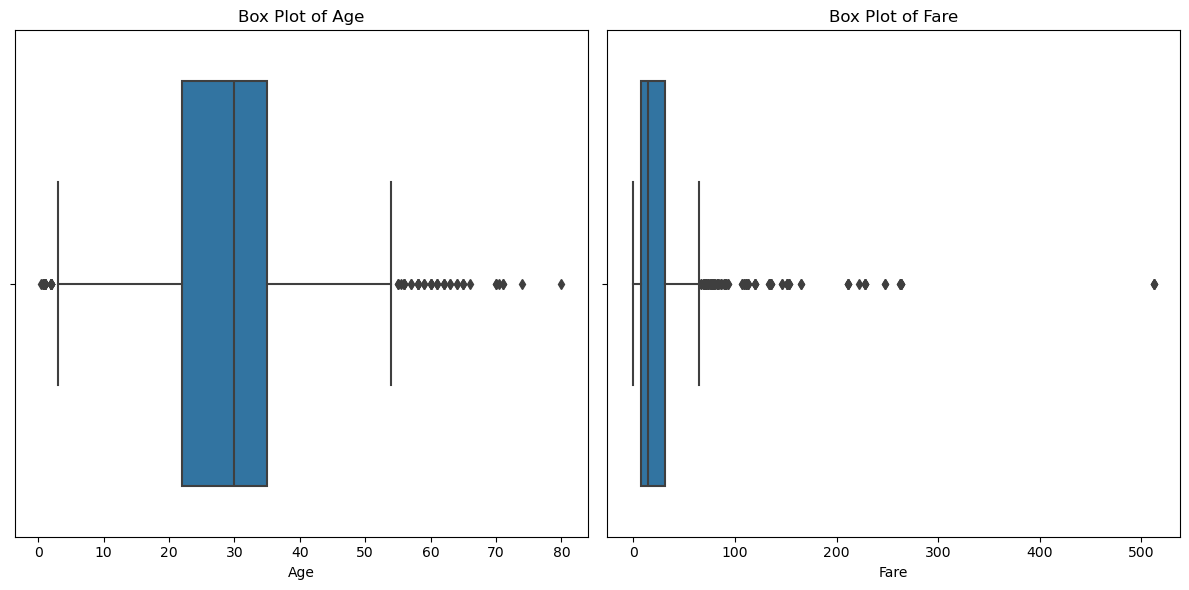

In [ ]:
# Set the size of the plots
plt.figure(figsize=(12, 6))

# Create a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)
sns.boxplot(data=df1, x='Age')
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=df1, x='Fare')
plt.title('Box Plot of Fare')

# Display the plots
plt.tight_layout()
plt.show()

#### Outlier detection and removal can be done using two popular methods: the Z-score and the Interquartile Range (IQR) method.IQR method is used in the below code.

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers and return the cleaned dataframe
    return df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]

# Remove outliers in 'Age' and 'Fare' columns
df1_cleaned = remove_outliers(df1, 'Age')
df1_cleaned = remove_outliers(df1_cleaned, 'Fare')

# Check how many rows remain after outlier removal
print(f"Original dataset shape: {df1.shape}")
print(f"Cleaned dataset shape: {df1_cleaned.shape}")

Original dataset shape: (889, 8)
Cleaned dataset shape: (718, 8)


### Scaling

#### Different features in a dataset may have different units and scales (e.g., height in meters and weight in kilograms). Scaling standardizes these features, bringing them to a common scale so they can be compared directly.Scaling ensures that each feature contributes equally to the analysis.In algorithms that use optimization techniques, such as gradient descent, scaling can help in faster convergence.

#### Among several Scaling techniques NORMALIZATION is used here.

In [ ]:
df1_cleaned.Age = (df1_cleaned.Age-min(df1_cleaned.Age))/(max(df1_cleaned.Age)-min(df1_cleaned.Age))
df1_cleaned.Fare = (df1_cleaned.Fare-min(df1_cleaned.Fare))/(max(df1_cleaned.Fare)-min(df1_cleaned.Fare))
df1_cleaned.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,0.334262,2.512535,0.681058,0.500438,0.413649,0.317549,0.280114,1.611421
std,0.472061,0.715818,0.466391,0.197256,0.855001,0.784792,0.215782,0.726646
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.372549,0.000000,0.000000,0.128538,2.000000
50%,0.000000,3.000000,1.000000,0.509804,0.000000,0.000000,0.191433,2.000000
75%,1.000000,3.000000,1.000000,0.585784,1.000000,0.000000,0.422426,2.000000
max,1.000000,3.000000,1.000000,1.000000,5.000000,6.000000,1.000000,2.000000


### After performing all these steps, now the dataset is clean, well-prepared and ready for training models.